# Let's hit the ground running!

Diffusion of a Gaussian in Oceananigans-world

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (333.958 μs)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (702.250 μs).
[ Info: Simulation is stopping after running for 177.480 ms.
[ Info: Simulation time 1 second equals or exceeds stop time 1 second.


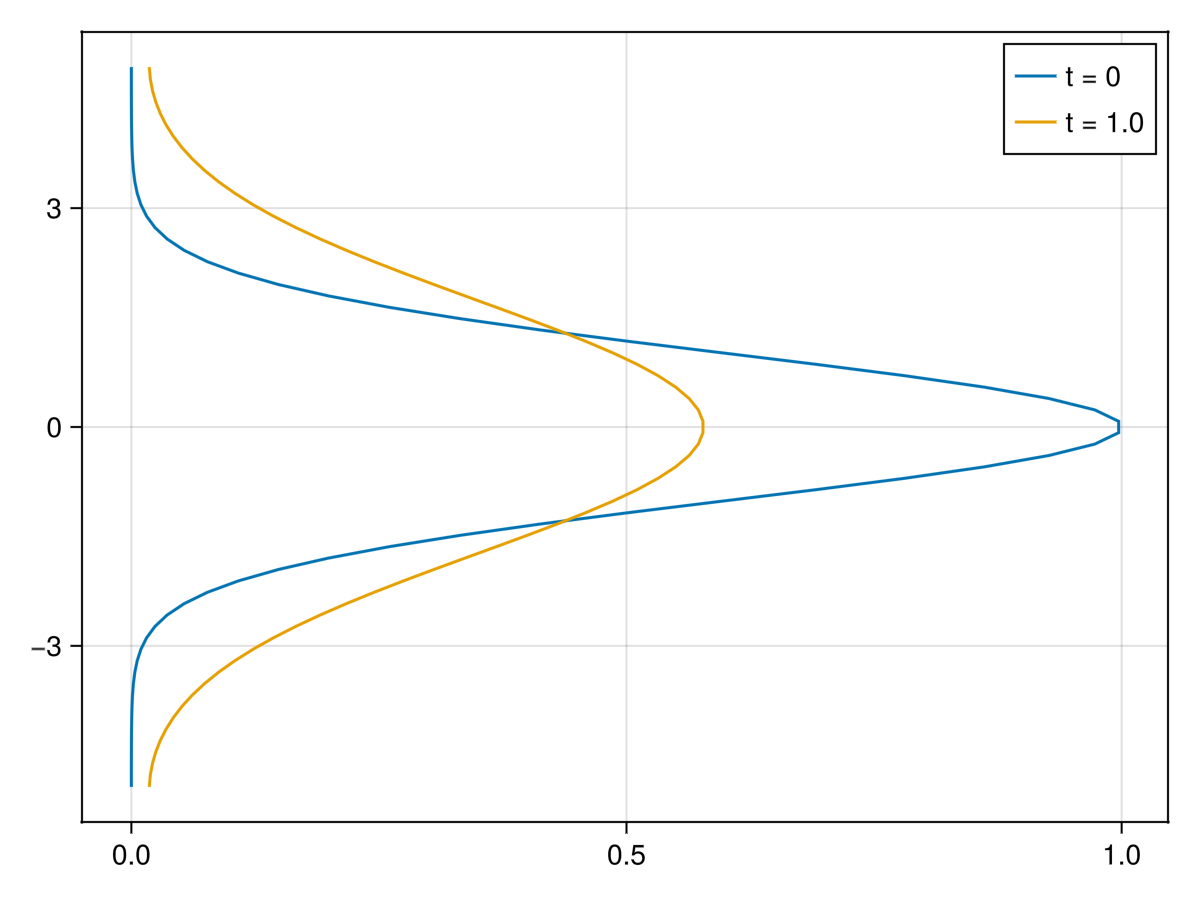

In [35]:
using Oceananigans
using GLMakie

# Make a grid
grid = RectilinearGrid(size=64, z=(-5, 5), topology=(Flat, Flat, Bounded))

# Build a model with one tracer and a constant, Laplacian (scalar) diffusivity
closure = ScalarDiffusivity(κ=1)
model = NonhydrostaticModel(; grid, closure, tracers=:c)

# Set the initial condition
set!(model, c=z -> exp(-z^2 / 2))

# Make a plot of the initial condition
c = interior(model.tracers.c, 1, 1, :)
z = znodes(model.tracers.c)
lines(c, z, label="t = 0")

# Build and run a simulation
Δt = 0.1 * (10/grid.Nz)^2 
simulation = Simulation(model; Δt, stop_time=1)
run!(simulation)

# Plot the final state
lines!(c, z, label=string("t = ", time(simulation)))
axislegend()
current_figure()

# Okay, one more time, more slowly

First we load the packages that we want to use.

In [ ]:
using Oceananigans
using GLMakie

The first thing to do in any Oceananigans problem is to define the domain and grid.
Here we want to do a 1D problem, so we use a RectilinearGrid with the x and y dimensions marked as "`Flat`".
For each dimension x, y, z, the topology can either be `Periodic`, `Bounded` or `Flat`.

In [36]:
grid = RectilinearGrid(size=64, z=(-5, 5), topology=(Flat, Flat, Bounded))

1×1×64 RectilinearGrid{Float64, Flat, Flat, Bounded} on CPU with 0×0×3 halo
├── Flat x
├── Flat y
└── Bounded  z ∈ [-5.0, 5.0]      regularly spaced with Δz=0.15625

In [37]:
closure = ScalarDiffusivity(κ=1)

ScalarDiffusivity{ExplicitTimeDiscretization}(ν=0.0, κ=1.0)

In [38]:
model = NonhydrostaticModel(; grid, closure, tracers=:c) # NonhydrostaticModel(grid=grid, closure=closure)

NonhydrostaticModel{CPU, RectilinearGrid}(time = 0 seconds, iteration = 0)
├── grid: 1×1×64 RectilinearGrid{Float64, Flat, Flat, Bounded} on CPU with 0×0×3 halo
├── timestepper: QuasiAdamsBashforth2TimeStepper
├── advection scheme: Centered reconstruction order 2
├── tracers: c
├── closure: ScalarDiffusivity{ExplicitTimeDiscretization}(ν=0.0, κ=(c=1.0,))
├── buoyancy: Nothing
└── coriolis: Nothing

In [39]:
model.tracers.c

1×1×64 Field{Center, Center, Center} on RectilinearGrid on CPU
├── grid: 1×1×64 RectilinearGrid{Float64, Flat, Flat, Bounded} on CPU with 0×0×3 halo
├── boundary conditions: FieldBoundaryConditions
│   └── west: Nothing, east: Nothing, south: Nothing, north: Nothing, bottom: ZeroFlux, top: ZeroFlux, immersed: ZeroFlux
└── data: 1×1×70 OffsetArray(::Array{Float64, 3}, 1:1, 1:1, -2:67) with eltype Float64 with indices 1:1×1:1×-2:67
    └── max=0.0, min=0.0, mean=0.0

In [40]:
cᵢ(z) = exp(-z^2 / 2)

cᵢ (generic function with 1 method)

In [41]:
set!(model, c=cᵢ)
model.tracers.c

1×1×64 Field{Center, Center, Center} on RectilinearGrid on CPU
├── grid: 1×1×64 RectilinearGrid{Float64, Flat, Flat, Bounded} on CPU with 0×0×3 halo
├── boundary conditions: FieldBoundaryConditions
│   └── west: Nothing, east: Nothing, south: Nothing, north: Nothing, bottom: ZeroFlux, top: ZeroFlux, immersed: ZeroFlux
└── data: 1×1×70 OffsetArray(::Array{Float64, 3}, 1:1, 1:1, -2:67) with eltype Float64 with indices 1:1×1:1×-2:67
    └── max=0.996953, min=5.49085e-6, mean=0.250663

In [52]:
simulation = Simulation(model, Δt=0.1/grid.Nz, stop_time=1)

Simulation of NonhydrostaticModel{CPU, RectilinearGrid}(time = 1 second, iteration = 640)
├── Next time step: 1.562 ms
├── Elapsed wall time: 0 seconds
├── Wall time per iteration: 0 seconds
├── Stop time: 1 second
├── Stop iteration : Inf
├── Wall time limit: Inf
├── Callbacks: OrderedDict with 4 entries:
│   ├── stop_time_exceeded => Callback of stop_time_exceeded on IterationInterval(1)
│   ├── stop_iteration_exceeded => Callback of stop_iteration_exceeded on IterationInterval(1)
│   ├── wall_time_limit_exceeded => Callback of wall_time_limit_exceeded on IterationInterval(1)
│   └── nan_checker => Callback of NaNChecker for u on IterationInterval(100)
├── Output writers: OrderedDict with no entries
└── Diagnostics: OrderedDict with no entries

In [53]:
run!(simulation)

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (2.567 ms)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (2.791 ms).
[ Info: Simulation is stopping after running for 0 seconds.
[ Info: Simulation time 1.002 seconds equals or exceeds stop time 1 second.


In [54]:
set!(model, c=cᵢ)
c = model.tracers.c
model.clock.time = 0
model.clock.iteration = 0

progress(sim) = @info string("Iter: ", iteration(sim), ", time: ", time(sim), ", max(c):", maximum(c))
simulation.callbacks[:progress] = Callback(progress, IterationInterval(100))

run!(simulation)

[ Info: Initializing simulation...
[ Info: Iter: 0, time: 0.0, max(c):0.9969528940670334
[ Info:     ... simulation initialization complete (14.469 ms)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (1.191 ms).
[ Info: Iter: 100, time: 0.1562499999999997, max(c):0.871357285497256
[ Info: Iter: 200, time: 0.3125000000000002, max(c):0.783597647423847
[ Info: Iter: 300, time: 0.46875000000000244, max(c):0.7178766928233304
[ Info: Iter: 400, time: 0.6250000000000047, max(c):0.6663017035552434
[ Info: Iter: 500, time: 0.7812500000000069, max(c):0.624438439429726
[ Info: Iter: 600, time: 0.9375000000000091, max(c):0.5895806959464182
[ Info: Simulation is stopping after running for 274.606 ms.
[ Info: Simulation time 1 second equals or exceeds stop time 1 second.


In [61]:
output_writer = JLD2OutputWriter(model, model.tracers,
                                 filename = "gaussian_diffusion.jld2",
                                 schedule = TimeInterval(0.1),
                                 overwrite_existing = true)

simulation.output_writers[:jld2] = output_writer

JLD2OutputWriter scheduled on TimeInterval(100 ms):
├── filepath: ./gaussian_diffusion.jld2
├── 1 outputs: c
├── array type: Array{Float64}
├── including: [:grid, :coriolis, :buoyancy, :closure]
├── file_splitting: NoFileSplitting
└── file size: 19.9 KiB

In [62]:
set!(model, c=cᵢ)
c = model.tracers.c
model.clock.time = 0
model.clock.iteration = 0
run!(simulation)

[ Info: Initializing simulation...
[ Info: Iter: 0, time: 0.0, max(c):0.9969528940670334
[ Info:     ... simulation initialization complete (13.946 ms)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (2.068 ms).
[ Info: Iter: 100, time: 0.1546874999999998, max(c):0.8723866746594131
[ Info: Iter: 200, time: 0.3093750000000002, max(c):0.7850965470222354
[ Info: Iter: 300, time: 0.46562500000000095, max(c):0.719028486196651
[ Info: Iter: 400, time: 0.6218750000000003, max(c):0.6672210093716684
[ Info: Iter: 500, time: 0.7781250000000011, max(c):0.6251949063683145
[ Info: Iter: 600, time: 0.9343750000000004, max(c):0.5902166261540999
[ Info: Simulation is stopping after running for 331.646 ms.
[ Info: Simulation time 1 second equals or exceeds stop time 1 second.


In [63]:
ct = FieldTimeSeries("gaussian_diffusion.jld2", "c")

1×1×64×11 FieldTimeSeries{InMemory} located at (Center, Center, Center) of c at gaussian_diffusion.jld2
├── grid: 1×1×64 RectilinearGrid{Float64, Flat, Flat, Bounded} on CPU with 0×0×3 halo
├── indices: (1:1, 1:1, 1:64)
├── time_indexing: Linear()
├── backend: InMemory()
├── path: gaussian_diffusion.jld2
├── name: c
└── data: 1×1×64×11 OffsetArray(::Array{Float64, 4}, 1:1, 1:1, 1:64, 1:11) with eltype Float64 with indices 1:1×1:1×1:64×1:11
    └── max=0.996953, min=5.49085e-6, mean=0.250663

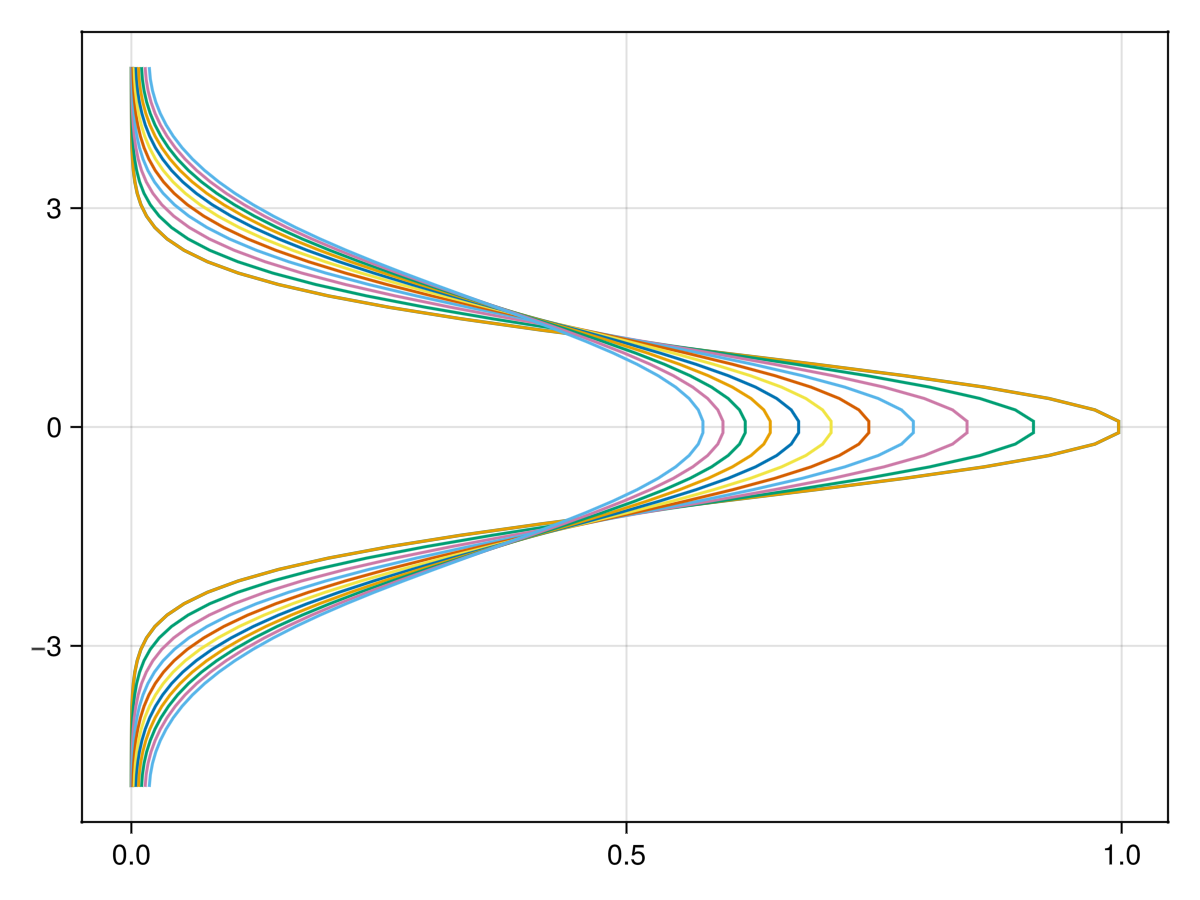

In [64]:
c1 = interior(ct[1], 1, 1, :)
z = znodes(ct)
lines(c1, z)

Nt = length(ct)
for n = 1:Nt
    cn = interior(ct[n], 1, 1, :)
    lines!(cn, z)
end
   
current_figure()

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (237.000 μs)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (281.208 μs).
[ Info: Simulation is stopping after running for 1.790 ms.
[ Info: Model iteration 10 equals or exceeds stop iteration 10.


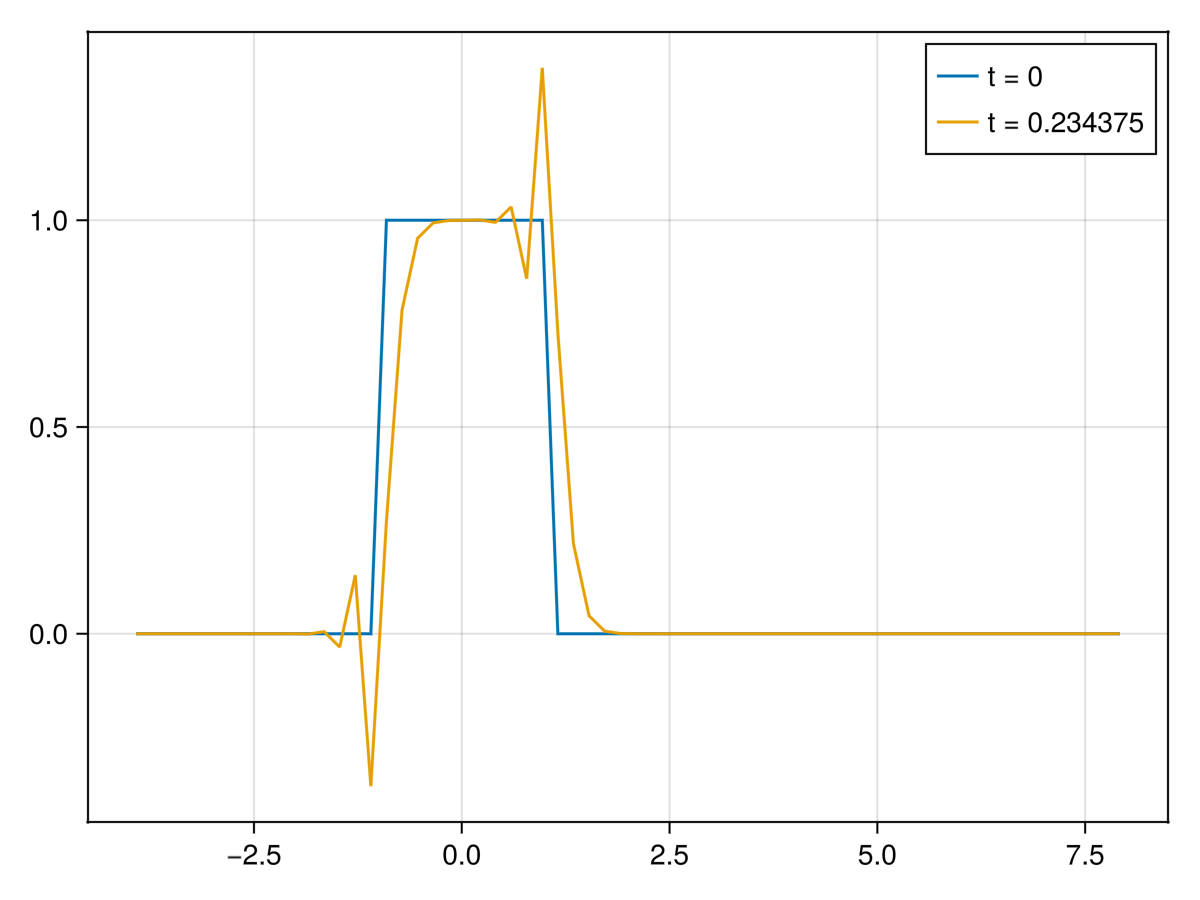

In [83]:
# Make a grid
grid = RectilinearGrid(size=64, x=(-4, 8), topology=(Periodic, Flat, Flat))

# Build a model with one tracer and a constant, Laplacian (scalar) diffusivity
u = XFaceField(grid)
set!(u, 1)
tracer_advection = CenteredSecondOrder()
velocities = PrescribedVelocityFields(u=u)
model = HydrostaticFreeSurfaceModel(; grid, tracer_advection, velocities, buoyancy=nothing, tracers=:c)

# Set the initial condition
set!(model, c= x -> abs(x) > 1 ? 0 : 1)

# Make a plot of the initial condition
c = interior(model.tracers.c, :, 1, 1)
x = xnodes(model.tracers.c)
lines(x, c, label="t = 0")

# Build and run a simulation
Δt = 0.1 * 15/grid.Nx 
simulation = Simulation(model; Δt, stop_iteration=10)
run!(simulation)

# Plot the final state
lines!(x, c, label=string("t = ", time(simulation)))
axislegend()
current_figure()

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (222.750 μs)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (289.875 μs).
[ Info: Simulation is stopping after running for 1.838 ms.
[ Info: Model iteration 10 equals or exceeds stop iteration 10.


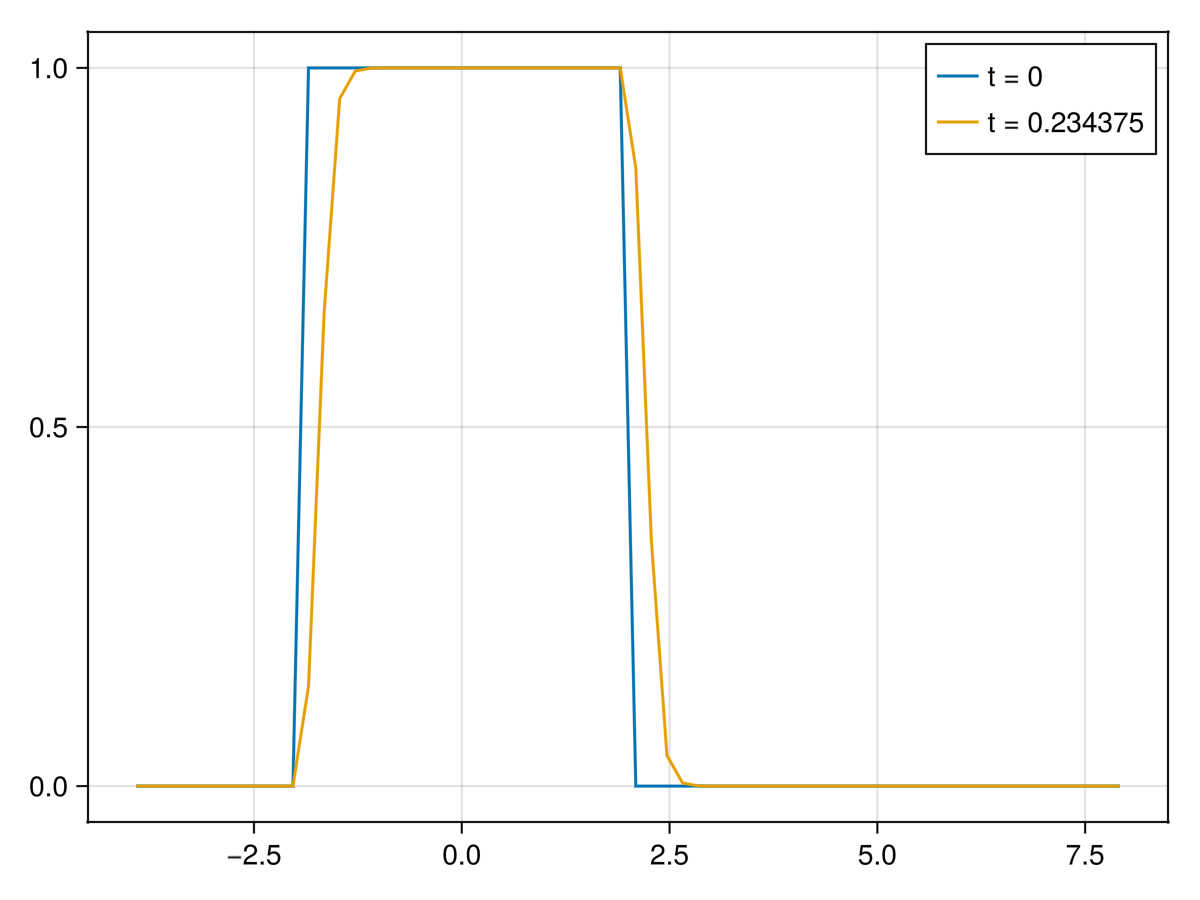

In [84]:
tracer_advection = WENO()
model = HydrostaticFreeSurfaceModel(; grid, tracer_advection, velocities, buoyancy=nothing, tracers=:c)

# Set the initial condition
set!(model, c= x -> abs(x) > 2 ? 0 : 1)

# Make a plot of the initial condition
c = interior(model.tracers.c, :, 1, 1)
x = xnodes(model.tracers.c)
lines(x, c, label="t = 0")

# Build and run a simulation
Δt = 0.1 * 15/grid.Nx 
simulation = Simulation(model; Δt, stop_iteration=10)
run!(simulation)

# Plot the final state
lines!(x, c, label=string("t = ", time(simulation)))
axislegend()
current_figure()

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (915.625 μs)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (289.917 μs).
[ Info: Simulation is stopping after running for 20.364 ms.
[ Info: Model iteration 110 equals or exceeds stop iteration 110.


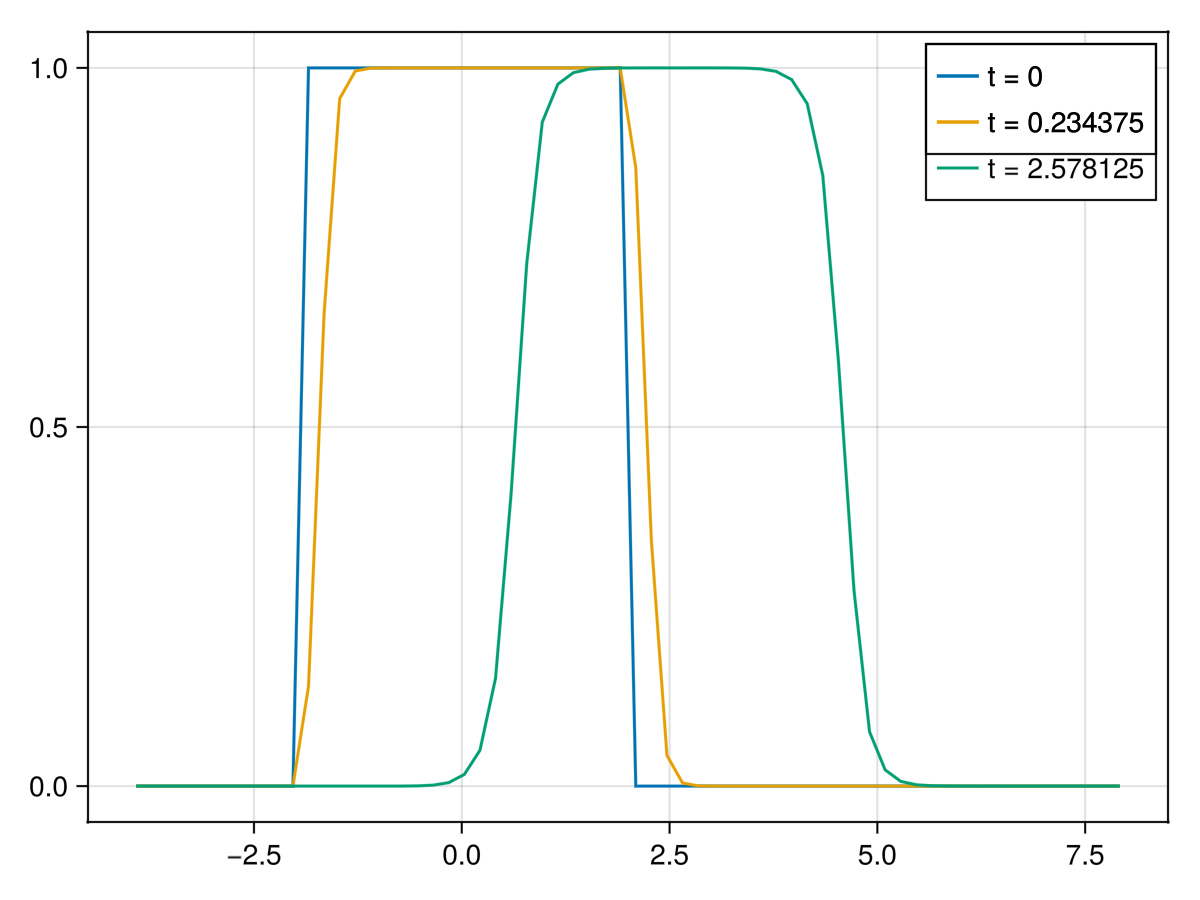

In [85]:
simulation.stop_iteration += 100
run!(simulation)
lines!(x, c, label=string("t = ", time(simulation)))
axislegend()
current_figure()

[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (145.583 μs)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (269.667 μs).
[ Info: Simulation is stopping after running for 47.228 ms.
[ Info: Simulation time 4 seconds equals or exceeds stop time 4 seconds.
[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (158.417 μs)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (278.583 μs).
[ Info: Simulation is stopping after running for 68.227 ms.
[ Info: Simulation time 4 seconds equals or exceeds stop time 4 seconds.
[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (169.583 μs)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (310.209 μs).
[ Info: Simulation is stopping after running for 59.535 ms.
[ Info: Simulation time 4 seconds equals or exceeds stop time 4 seconds.
[ Info: Initiali

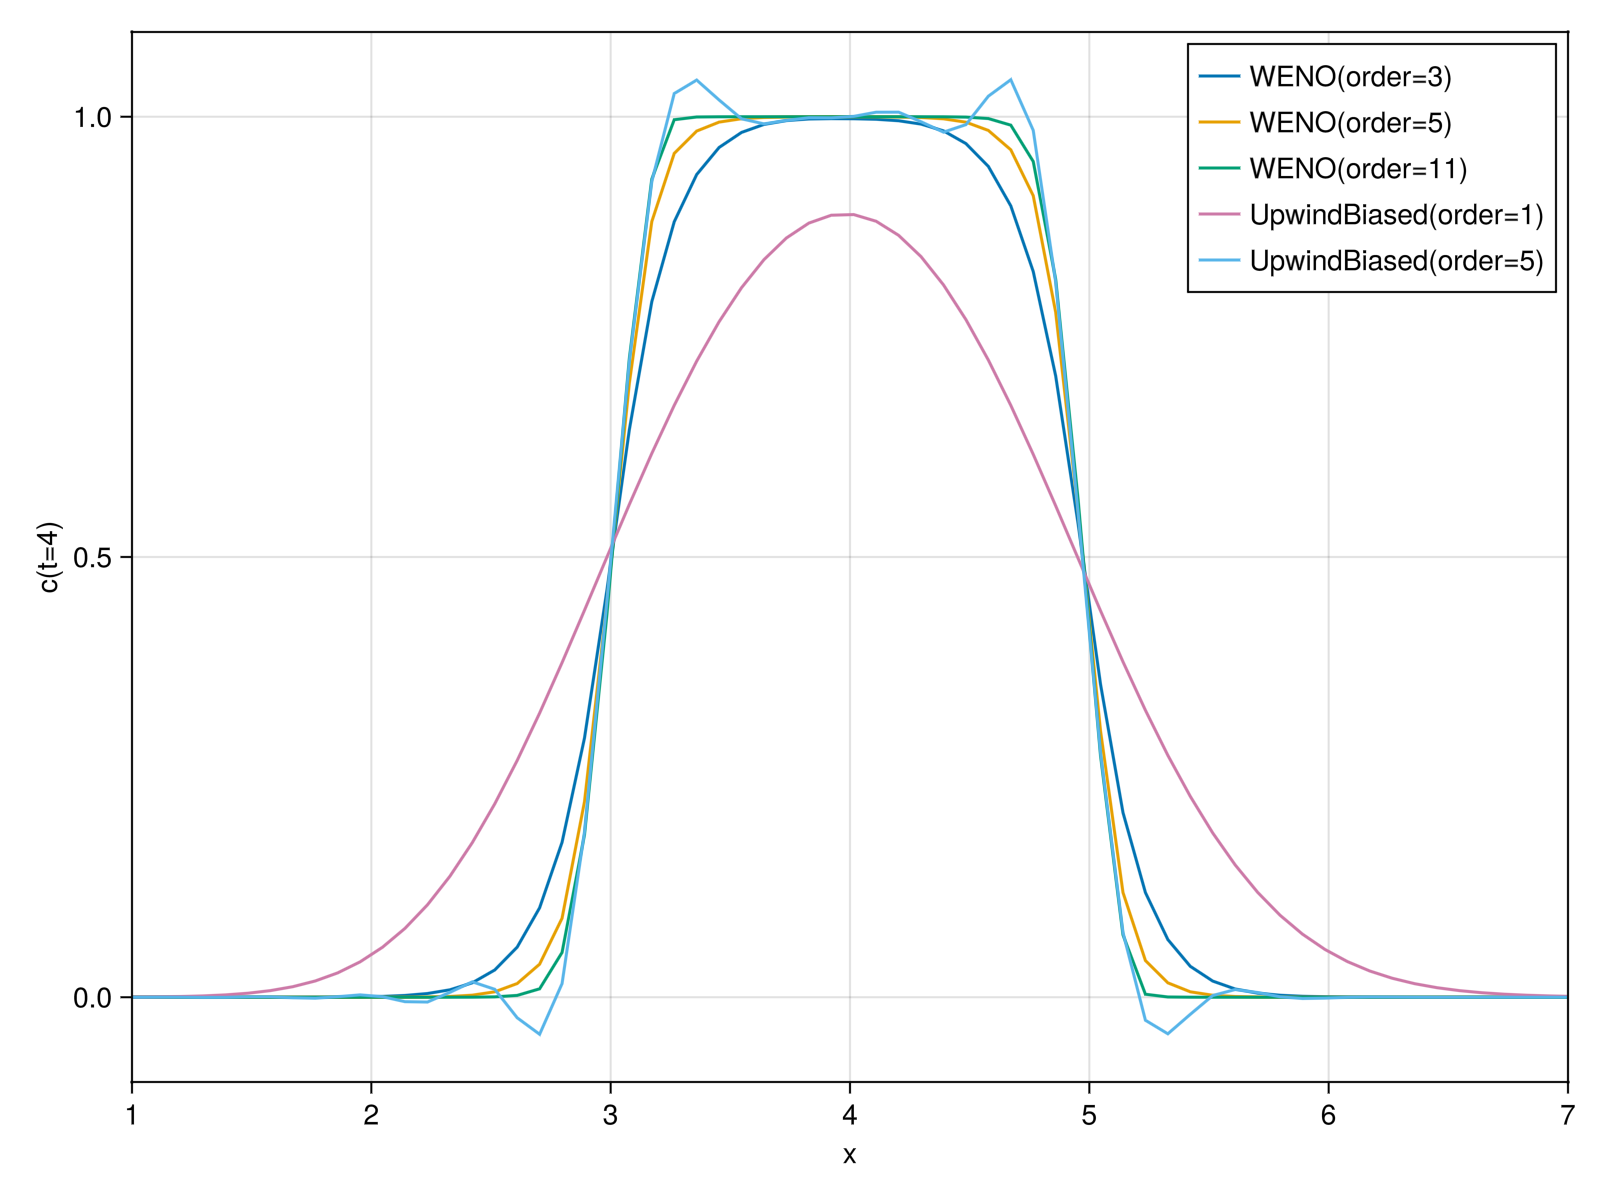

In [100]:
"""
    advect_tracer(advection_scheme, Nx=128, stop_time=4)

Advect a tracer with a top-hat profile until `stop_time` using `Nx` grid points.
Returns `x, c`.
"""
function advect_tracer(advection_scheme, Nx=128, stop_time=4)
    # Make a grid
    grid = RectilinearGrid(size=Nx, x=(-4, 8), halo=7, topology=(Periodic, Flat, Flat))

    # Build a model with one tracer and a constant, Laplacian (scalar) diffusivity
    u = XFaceField(grid)
    set!(u, 1)
    velocities = PrescribedVelocityFields(u=u)
    model = HydrostaticFreeSurfaceModel(; grid, tracer_advection=advection_scheme, velocities, buoyancy=nothing, tracers=:c)

    # Set the initial condition
    set!(model, c= x -> abs(x) > 1 ? 0 : 1)
    
    # Build and run a simulation
    Δt = 0.1 * 12/Nx 
    simulation = Simulation(model; Δt, stop_time)
    run!(simulation)
    
    c = interior(model.tracers.c, :, 1, 1)
    x = xnodes(model.tracers.c)
    
    return x, c
end

fig = Figure(size=(800, 600))
ax = Axis(fig[1, 1], xlabel="x", ylabel="c(t=4)")

for N = (3, 5, 11)
    scheme = WENO(order=N)
    x, c = advect_tracer(scheme)
    lines!(ax, x, c, label="WENO(order=$N)")
end

for N = (1, 5)
    x, c = advect_tracer(UpwindBiased(order=N))
    lines!(ax, x, c, label="UpwindBiased(order=$N)")
end

axislegend(ax)
xlims!(ax, 1, 7)
fig